In [1]:
#installing the kaggle library
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dogs vs Cats Dataset from kaggle

In [3]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:33<00:00, 24.5MB/s]
100% 812M/812M [00:33<00:00, 25.1MB/s]


In [4]:
! ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images:' , file_count)

number of images: 25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.10799.jpg', 'cat.6314.jpg', 'dog.12212.jpg', 'cat.9168.jpg', 'dog.9281.jpg', 'dog.7036.jpg', 'cat.6473.jpg', 'cat.4416.jpg', 'cat.10976.jpg', 'cat.11049.jpg', 'cat.11191.jpg', 'dog.6431.jpg', 'dog.1771.jpg', 'dog.7913.jpg', 'cat.490.jpg', 'dog.6072.jpg', 'dog.849.jpg', 'dog.8614.jpg', 'cat.8873.jpg', 'cat.9243.jpg', 'cat.631.jpg', 'dog.4718.jpg', 'dog.5888.jpg', 'dog.8452.jpg', 'dog.452.jpg', 'dog.4007.jpg', 'dog.2015.jpg', 'dog.124.jpg', 'cat.5195.jpg', 'dog.10158.jpg', 'dog.12282.jpg', 'cat.11198.jpg', 'cat.8264.jpg', 'dog.6383.jpg', 'dog.3262.jpg', 'dog.4241.jpg', 'dog.6288.jpg', 'cat.3096.jpg', 'cat.10489.jpg', 'dog.6484.jpg', 'cat.929.jpg', 'dog.4861.jpg', 'cat.10725.jpg', 'cat.12392.jpg', 'dog.7107.jpg', 'cat.8638.jpg', 'cat.1634.jpg', 'cat.4223.jpg', 'dog.2506.jpg', 'cat.10637.jpg', 'cat.4677.jpg', 'cat.483.jpg', 'cat.11202.jpg', 'cat.3664.jpg', 'cat.5411.jpg', 'dog.12277.jpg', 'dog.9343.jpg', 'cat.6928.jpg', 'dog.3500.jpg', 'dog.1902.jpg', 'cat.1159.jpg', 'cat.455.jpg', '

Importing the dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

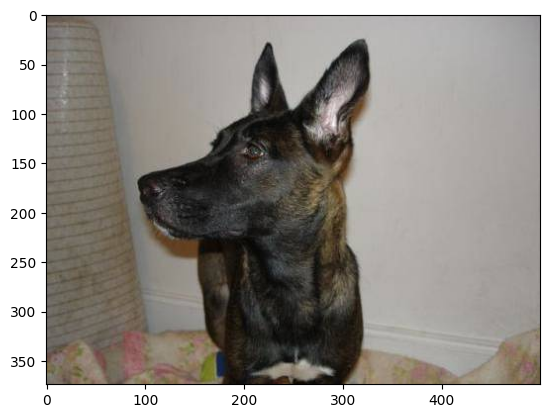

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.2828.jpg')
imgplot = plt.imshow(img)
plt.show()

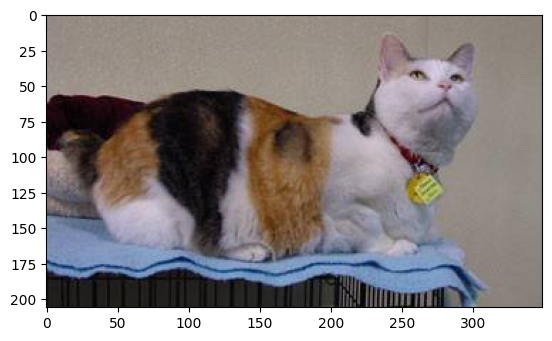

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.2694.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train')

dog_count = sum(1 for name in file_names if name.startswith('dog'))
cat_count = sum(1 for name in file_names if name.startswith('cat'))
print('Number of dogs:', dog_count)
print('Number of cats:', cat_count)

Number of dogs: 12500
Number of cats: 12500


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  elif name == 'cat':
    cat_count += 1

print('number of dogs:', dog_count)
print('number of cats:', cat_count)

number of dogs: 12500
number of cats: 12500


  Resizing all the images

In [14]:
# creating a directory for resized images
os.mkdir('/content/image resized/')

In [15]:
import os

# Check if the directory exists before trying to create it.
if not os.path.exists('/content/image resized/'):
    os.mkdir('/content/image resized/')
    print("Directory created successfully!")
else:
    print("Directory already exists.")

Directory already exists.


In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range (2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)



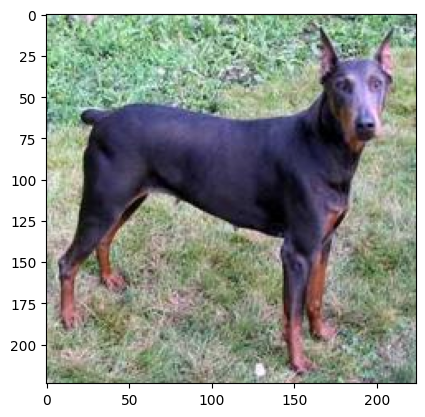

In [19]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.12212.jpg')
imgplt = plt.imshow(img)
plt.show()

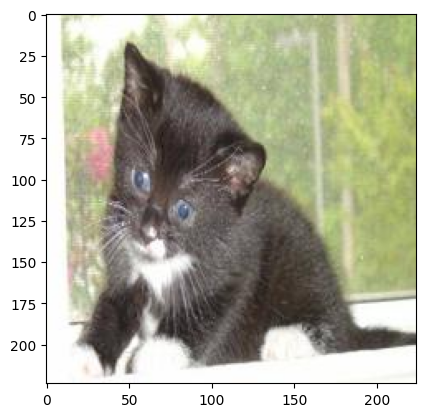

In [20]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.9168.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat--->0

Dog-->

In [21]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')
labels = [1 if name.startswith('dog') else 0 for name in filenames[:2000]]

print(filenames[:5])
print(labels[:5])




['dog.10799.jpg', 'cat.6314.jpg', 'dog.12212.jpg', 'cat.9168.jpg', 'dog.9281.jpg']
[1, 0, 1, 0, 1]


In [22]:
print(filenames[0:5])
print(len(filenames))

['dog.10799.jpg', 'cat.6314.jpg', 'dog.12212.jpg', 'cat.9168.jpg', 'dog.9281.jpg']
2000


In [23]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [24]:
# counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1007  993]


Converting all the images to numpy arrrays

In [25]:
import cv2
import glob

In [26]:
images_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(images_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[210 167 124]
   [208 165 122]
   [208 165 122]
   ...
   [118 154 118]
   [127 160 126]
   [128 161 127]]

  [[205 162 119]
   [204 161 118]
   [205 162 119]
   ...
   [125 163 127]
   [136 172 136]
   [131 167 131]]

  [[199 156 113]
   [199 156 113]
   [201 158 115]
   ...
   [122 163 125]
   [134 173 135]
   [126 165 127]]

  ...

  [[ 91 128  90]
   [ 73 110  72]
   [ 76 110  73]
   ...
   [119 163  96]
   [ 86 131  62]
   [ 57 104  35]]

  [[ 91 124  89]
   [ 72 106  69]
   [ 66  99  62]
   ...
   [126 169 102]
   [100 144  75]
   [ 60 105  36]]

  [[ 96 129  94]
   [ 58  91  56]
   [ 55  88  51]
   ...
   [118 159  92]
   [114 158  89]
   [ 98 142  73]]]


 [[[128 141 139]
   [128 141 139]
   [128 141 139]
   ...
   [144 148 149]
   [149 151 152]
   [152 154 155]]

  [[128 141 139]
   [128 141 139]
   [128 141 139]
   ...
   [145 149 150]
   [149 151 152]
   [151 153 154]]

  [[128 141 139]
   [128 141 139]
   [128 141 139]
   ...
   [148 152 153]
   [149 153 154]
   [150 154

In [28]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

In [29]:
X = dog_cat_images
y = np.asarray(labels)

Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [31]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [32]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
print(X_train_scaled)

[[[[0.29019608 0.27843137 0.2627451 ]
   [0.29411765 0.29019608 0.2745098 ]
   [0.25098039 0.25490196 0.23921569]
   ...
   [0.02352941 0.07058824 0.04705882]
   [0.02352941 0.0627451  0.03921569]
   [0.01960784 0.05882353 0.03529412]]

  [[0.30980392 0.29803922 0.28235294]
   [0.31764706 0.31372549 0.29803922]
   [0.27843137 0.28235294 0.26666667]
   ...
   [0.01568627 0.05490196 0.03137255]
   [0.01568627 0.05490196 0.03137255]
   [0.01960784 0.05882353 0.03529412]]

  [[0.33333333 0.32156863 0.30588235]
   [0.34509804 0.34117647 0.3254902 ]
   [0.31372549 0.31764706 0.30196078]
   ...
   [0.01176471 0.04313725 0.01568627]
   [0.01960784 0.05098039 0.02352941]
   [0.02352941 0.05490196 0.02745098]]

  ...

  [[0.18823529 0.58039216 0.23529412]
   [0.21568627 0.6        0.27058824]
   [0.22745098 0.59607843 0.29411765]
   ...
   [0.52941176 0.59607843 0.58039216]
   [0.52941176 0.59607843 0.58039216]
   [0.5254902  0.59215686 0.57647059]]

  [[0.18039216 0.59215686 0.23529412]
   [0.2

Building the neural network

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [35]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [36]:
num_of_classes = 2

model = tf.keras.Sequential([
                             pretrained_model,
                             tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']

)

In [38]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 77s 1s/step - loss: 0.2174 - acc: 0.9106
Epoch 2/5
50/50 [==============================] - 72s 1s/step - loss: 0.0792 - acc: 0.9725
Epoch 3/5
50/50 [==============================] - 66s 1s/step - loss: 0.0600 - acc: 0.9806
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0507 - acc: 0.9850
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0400 - acc: 0.9894


In [39]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test loss:', score)
print('Test accuracy:', acc)

13/13 [==============================] - 20s 2s/step - loss: 0.0575 - acc: 0.9725
Test loss: 0.0575476698577404
Test accuracy: 0.9725000262260437


Predictive System

Path of the image to be predicted: /content/dog4.jpg


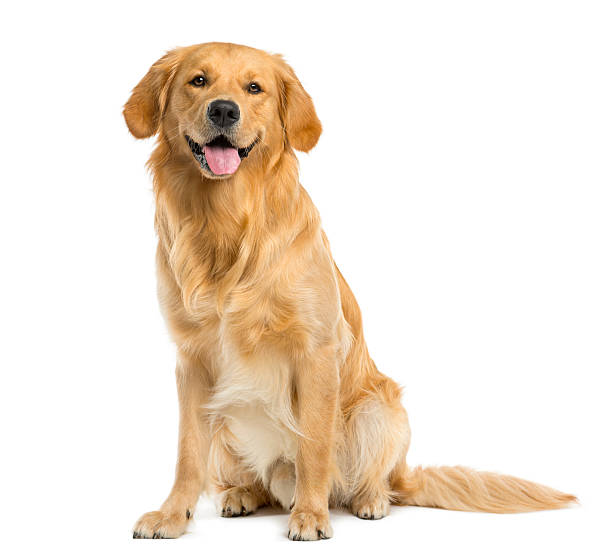

1/1 [==============================] - 1s 520ms/step
The image contains a dog with confidence: 0.996409


In [40]:
def predict_image_class(img_path, model, threshold=0.8):
    input_image = cv2.imread(img_path)

    # Show the image
    cv2_imshow(input_image)

    # Resize and preprocess the image
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255.0
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Predict the class
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)
    confidence = tf.nn.softmax(input_prediction[0])[input_pred_label].numpy()

    # Print the prediction
    if confidence < threshold:
        print('The image is invalid or contains an unknown animal.')
    elif input_pred_label == 0:
        print(f'The image contains a cat with confidence: {confidence:.6f}')
    else:
        print(f'The image contains a dog with confidence: {confidence:.6f}')

# Input image path
input_image_path = input('Path of the image to be predicted: ')
predict_image_class(input_image_path, model)